# Практическая работа II - 2

## Задания

1. Для данных MNIST построить нейронную сеть с выводом логов для tensorboard. Посмотреть в изменение логов в процессе обучения.
2. Сравнить поведение процесса обучения различными оптимизаторами для модели (графики истории).
3. Изменить структуру сети так, чтобы модель переобучалась (для этого можно использовать тест как валидацию). Посмотреть, как это будут выглядеть графики обучения. (Если не удаётся переобучить, то уменьшить размер тренировочной выборки).
4. Использовать аугментацию при обучении. Сравнить графики.

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


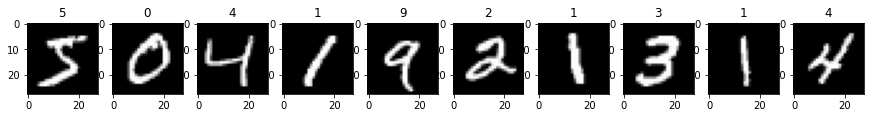

In [14]:
# 1

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Train:', x_train.shape, y_train.shape)
print('Test:', x_test.shape, y_test.shape)

plt.figure(figsize=(15, 1.5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
plt.show()

In [15]:
from keras.layers import Dense, Conv2D, Input, Flatten, MaxPool2D
from keras.models import Model
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

inp = Input(shape=(28, 28, 1))
layer = Conv2D(filters=8, kernel_size=(3, 3), padding='same')(inp)
layer = MaxPool2D(pool_size=(2, 2))(layer)
layer = Conv2D(filters=16, kernel_size=(3, 3), padding='same')(layer)
layer = MaxPool2D(pool_size=(2, 2))(layer)

layer = Flatten()(layer)
layer = Dense(units=128)(layer)
out = Dense(units=10, activation='softmax')(layer)

model = Model(inp, out)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480

In [16]:
x_train_scaled = x_train/255.
x_test_scaled = x_test / 255.
y_train_cl = to_categorical(y_train, num_classes=10)
y_test_cl = to_categorical(y_test, num_classes=10)

In [17]:
from keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs/example1')

In [18]:
history = model.fit(x_train_scaled, y_train_cl,
                    validation_data=(x_test_scaled, y_test_cl),
                    epochs=5, batch_size=32, verbose=1,
                    callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 99s 52ms/step - loss: 0.3569 - accuracy: 0.8945 - val_loss: 0.0789 - val_accuracy: 0.9734
Epoch 2/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0772 - accuracy: 0.9766 - val_loss: 0.0641 - val_accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0606 - accuracy: 0.9815 - val_loss: 0.0717 - val_accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 83s 45ms/step - loss: 0.0533 - accuracy: 0.9830 - val_loss: 0.0730 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0483 - accuracy: 0.9839 - val_loss: 0.0593 - val_accuracy: 0.9806


in terminal run
> tensorboard --bind_all --logdir MachineLearning_mmf_2021/logs/example1/validation/

In [6]:
model.save("HW-II-2-model")

INFO:tensorflow:Assets written to: HW-II-2-model/assets


In [ ]:
import tensorflow as tf
from tensorflow import keras
model = keras.models.load_model("HW-II-2-model")

In [ ]:
# 2
plt.figure(figsize=(10,10))
plt.plot(range(1, 6), history.history['accuracy'], label='accuracy')
plt.ylabel('accuracy value')
plt.xlabel('epochs')
plt.grid()
plt.legend()
plt.show()

In [11]:
# 2
plt.figure(figsize=(10,10))
plt.plot(range(1, 6), history.history['accuracy'], label='accuracy')
plt.ylabel('accuracy value')
plt.xlabel('epochs')
plt.grid()
plt.legend()
plt.show()

NameError: name 'history' is not defined

<Figure size 720x720 with 0 Axes>